# Tratamiento de imágenes (básico)

Este notebook tiene como objetivo introducir las técnicas básicas del procesamiento de imágenes como: 


* Filtrado: ¿te has preguntado como los celulares nos dejan las fotos tan lindas?


* Reducción de tamañaos: A veces no es necesario tener una imágen con tanta calidad, mientras más calidad se tenga mas recursos se usan


* Clasificación: ¿Como funcionan los reconocimientos faciales? 


# Imágenes digitales
Una imagen digital es un tipo de imagen que puede ser manipulada por equipos técnologicos, como computadores, camaras etc. La imagen digital es un código numérico que luego el equipo técnologico lo representa en pantalla mediante píxeles. 

Un **pixel**  es la menor unidad de color que conforma una imagen digital. Todos hemos agrandado una imagen y hemos visto una malla cuadriculada (sobre todo en imagenes de poca calidad). Cada cuadrado corresponde a un pixel. La resolución de la imagen esta definida por la cantidad de pixeles por pulgada (ppp), mientras mayor cantidad de pixeles por pulgada lineal, mayor será la calidad de la imagen 
![](pixel.jpg)

¿Como almacenamos el color en cada pixel? Un **bit** es la unidad mínima de información, esta unidad es binaria, es decir, se representa por el número 0 o el número 1. Con un bit solo podemos representar dos estados, en el marco de imágenes digitales, el 0 representa el color blanco y el 1 representa el color negro. **La profundidad de color** se refiere al número de bits necesarios para guardar la información de color de cada píxel en una imagen. Por ejemplo, se utiliza 1 bit para imágenes en blanco y negro, como se explico anteriormente, 2 bits para 4 colores; supongamos que queremos tratar una imagen con el color blanco, rojo, azul y negro, la codificación podría ser del estilo $0$ = blanco , $01$ = rojo, $10$ = azul y $1$ = negro. Para imágenes de 8 colores se utilizan 3 bits; un color sería codificado como $100$, por ejemplo. En general para $n$ bits se tiene una cantidad de $2^n$ colores!. 

#### 8 bits
Este formato es usual,  teniendo un total de 256 colores. Lo favorable de este formato es que las imágenes no ocupan tanta memoria

#### Modo RGB

Cada color se forma por una combinación de diferentes intensidades de los colores primarios: rojo (Red), verde (Green) y azul (Blue). La intensidad de cada color varia con una numeración entre 0 y 255 (8 bits!). Un color es representado en este formato por una tupla; un color tendría una representación del estilo $(234,123, 122)$ por ejemplo. El color rojo puro corresponde a (255,0,0) , el verde puro a (0,255,0) y el azul puro. ¿Cuantos colores soporta el modo RGB? simple combinatoria $255\cdot 255 \cdot 255 = 16581375$ colores!!.

#### Formatos JPG, PNG



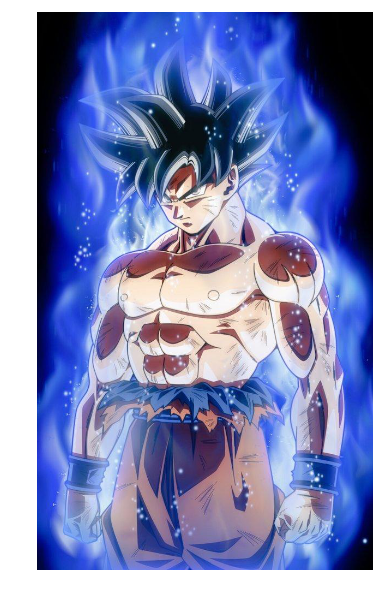

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image   
### cargando y visualizando nuestra primera imágen!! ###
plt.figure(figsize = (10,10))
goku = Image.open('goku-limit-breaker.JPG')  ### LECTURA DE LA IMAGEN
plt.imshow(goku)
plt.axis('off')
plt.show()

In [64]:
## Obteniendo información de la imágen ##
print goku.format, goku.size, goku.mode
goku.getdata

JPEG (616, 1024) RGB


<bound method JpegImageFile.getdata of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=616x1024 at 0x8D97CF8>>

 Al imprimir los comandos anteriores, `goku.format` nos otorgo el formato de la imágen, el cual es JPEG. Por otro lado`goku.size` nos otorgo la tupla `(616, 1024)`, esto significa que la imagen es de 616 por 1024 pixeles!. Finalmente `goku.mode` nos otorgo el modo, que en este caso es RGB.

### Conversión de la imagen en un array
Convertiremos la imagen en una matriz de Numpy

(1024L, 616L, 3L)


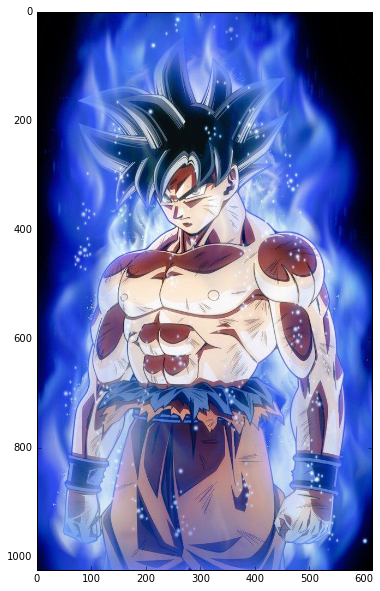

In [62]:
goku_matriz = np.asarray(Image.open('goku-limit-breaker.JPG'))
print goku_matriz.shape
plt.figure(figsize = (10,10))
plt.imshow(goku_matriz)

Intencionalmente a modo de ilustración dejamos los valores en los ejes en la imagen anterior. Cada pixel es representado por una coordenada en el plano cartesiano. Para acceder a el color presente en cada pixel hacemos lo siguiente

In [69]:
## accedemos a cualquier color del pixel+
nx = 5   ####### nx va entre 0 y 1023
ny = 100    ###### ny va entre 0 y 615
print 'el color del pixel', (nx,ny), 'es', goku_matriz[nx,ny,:]

el color del pixel (5, 100) es [ 2 15 93]


Para conocer la profundidad de color realizamos

In [72]:
### profundidad de color ###
goku_matriz.dtype ### 'unit 8' significa que la profundidad de color son 8 bits

dtype('uint8')

### Conversión a escala de grises

La conversión de una imagen RGB a escala de grises es sencilla. El color de cada pixel viene dado por la formúla

$$ 0.299R + 0.587G + 0.114B $$

Note que al realizar esta conversión, la imagen ya deja de estar en formato RGB.

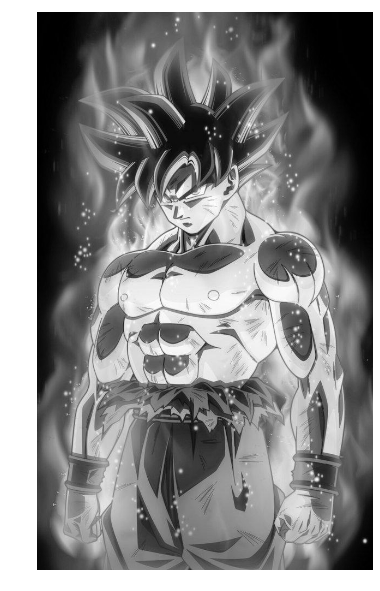

In [146]:
### Conversión manual ###
def conversion_gris(matriz):
    gris = 0.299*matriz[:,:,0] + 0.587*matriz[:,:,1] + 0.114*matriz[:,:,2]
    return gris

plt.figure(figsize = (10,10))
plt.axis('off')
goku_gris = conversion_gris(goku_matriz)
goku_gris.astype(int) ### Transformamos la matriz a enteros!!
plt.imshow(goku_gris, cmap = plt.get_cmap('gray'))


### Esta ya instaurada la forma de transformar una imagen a escala de grises!!


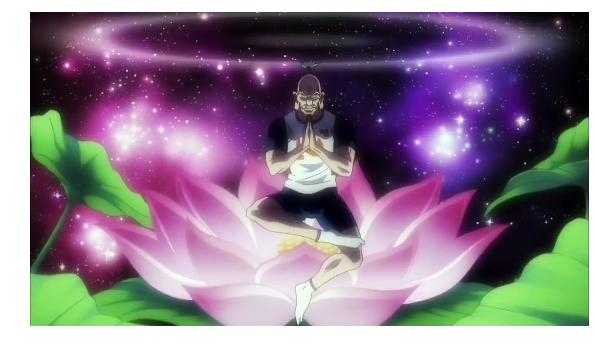

In [155]:
plt.figure(figsize = (10,10))
netero = Image.open('netero.jpg')
plt.axis('off')
plt.imshow(netero)

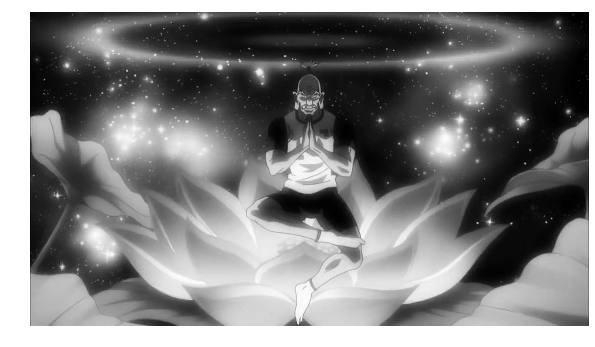

In [160]:
## a grises ##
plt.figure(figsize = (10,10))
plt.axis('off')
netero_gris = Image.open('netero.jpg').convert('L')
plt.imshow(netero_gris, cmap = 'gray')

### Disminución del tamaño de una imagen

A veces conviene disminuir el tamaño de la imagen para ahorrar memoria. Basta realizar

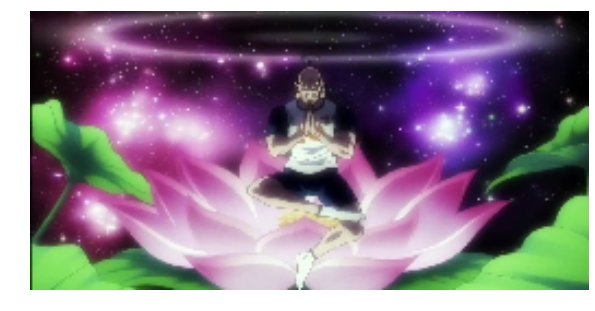

In [169]:
plt.figure(figsize = (10,10))
plt.axis('off')
netero_chico = netero.resize((256,128))
plt.imshow(netero_chico)

#### observen que la calidad disminuyo!!

editando!!!!!!!!!!!!!!!!!!!!!